# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis And Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Dropping columns 'Name','Email','Phone-Number' and 'Credit-Card' as they are personal details

In [4]:
df.drop(['name','email','phone-number','credit_card'],axis =1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(['agent','company'],axis = 1,inplace = True)
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Let's have a look at the outliers

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
df = df[df['adr']<5000]

# Data Analysis and visualizations

In [13]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

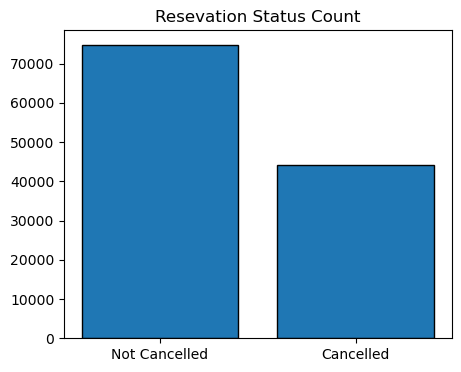

In [14]:
plt.figure(figsize = (5,4))
plt.title('Resevation Status Count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor = 'black')
plt.show()

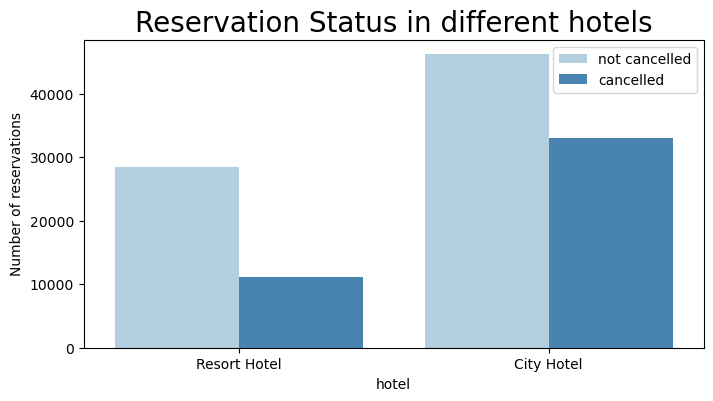

In [15]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()  
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation Status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('Number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

In [16]:
resort_hotels = df[df['hotel'] == 'Resort Hotel']
resort_hotels['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [17]:
city_hotels = df[df['hotel'] == 'City Hotel']
city_hotels['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [18]:
resort_hotels = resort_hotels.groupby('reservation_status_date')[['adr']].mean()
city_hotels = city_hotels.groupby('reservation_status_date')[['adr']].mean()

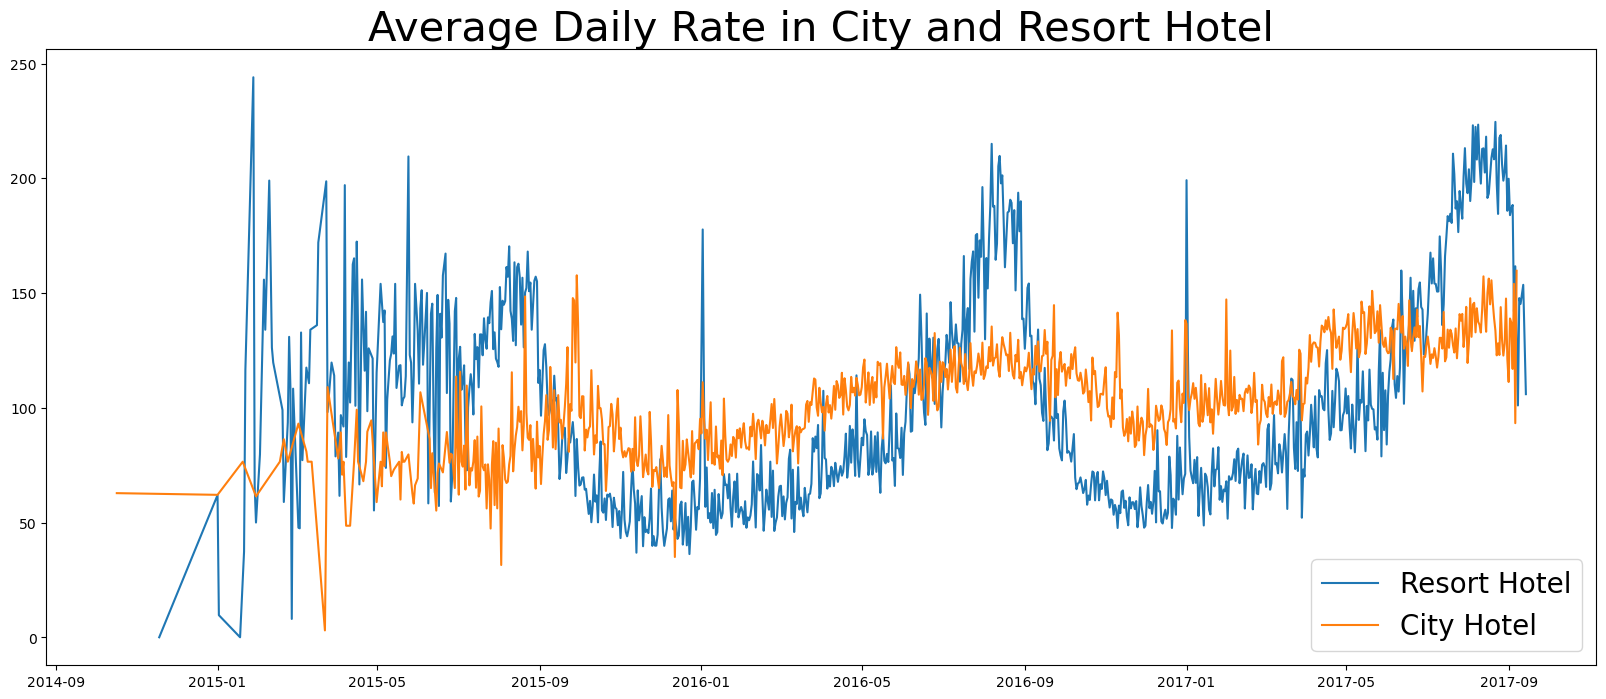

In [19]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)
plt.plot(resort_hotels.index,resort_hotels['adr'],label = 'Resort Hotel')
plt.plot(city_hotels.index,city_hotels['adr'],label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

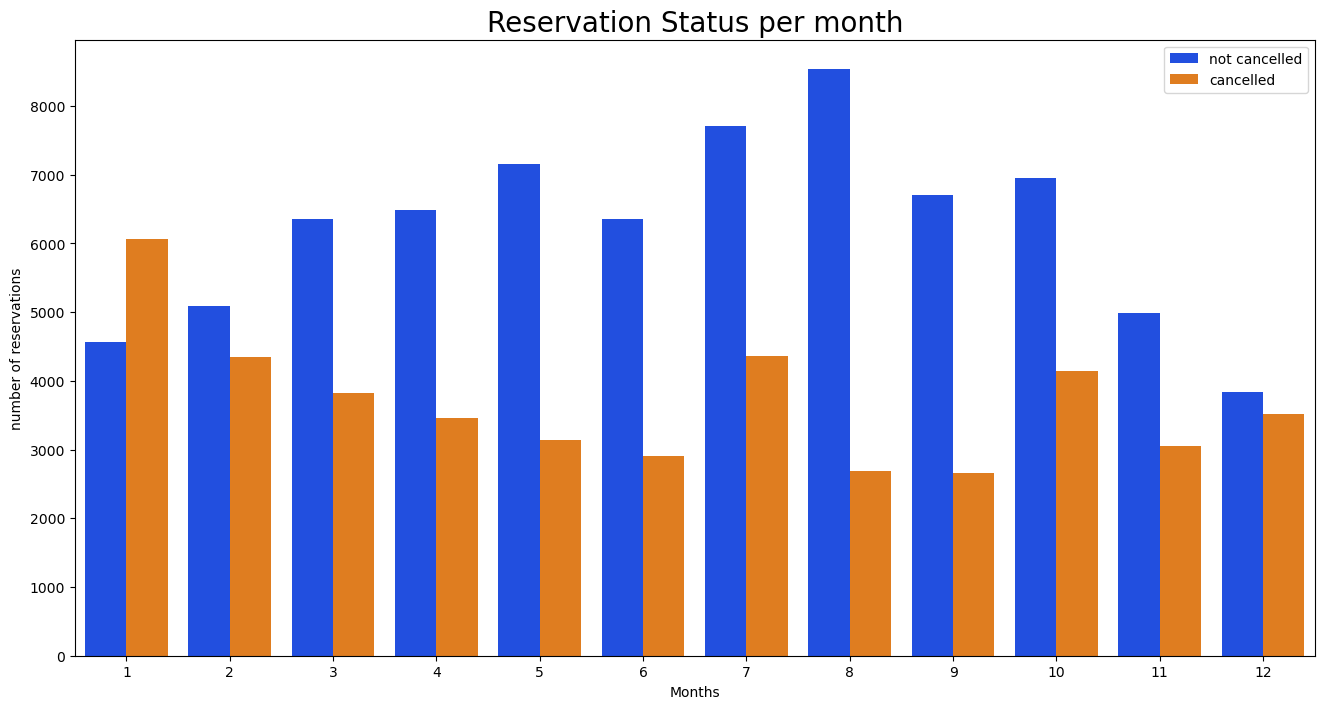

In [20]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled' , data = df, palette =  'bright')
legend_labels,_  = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per month',size = 20)
plt.xlabel('Months')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

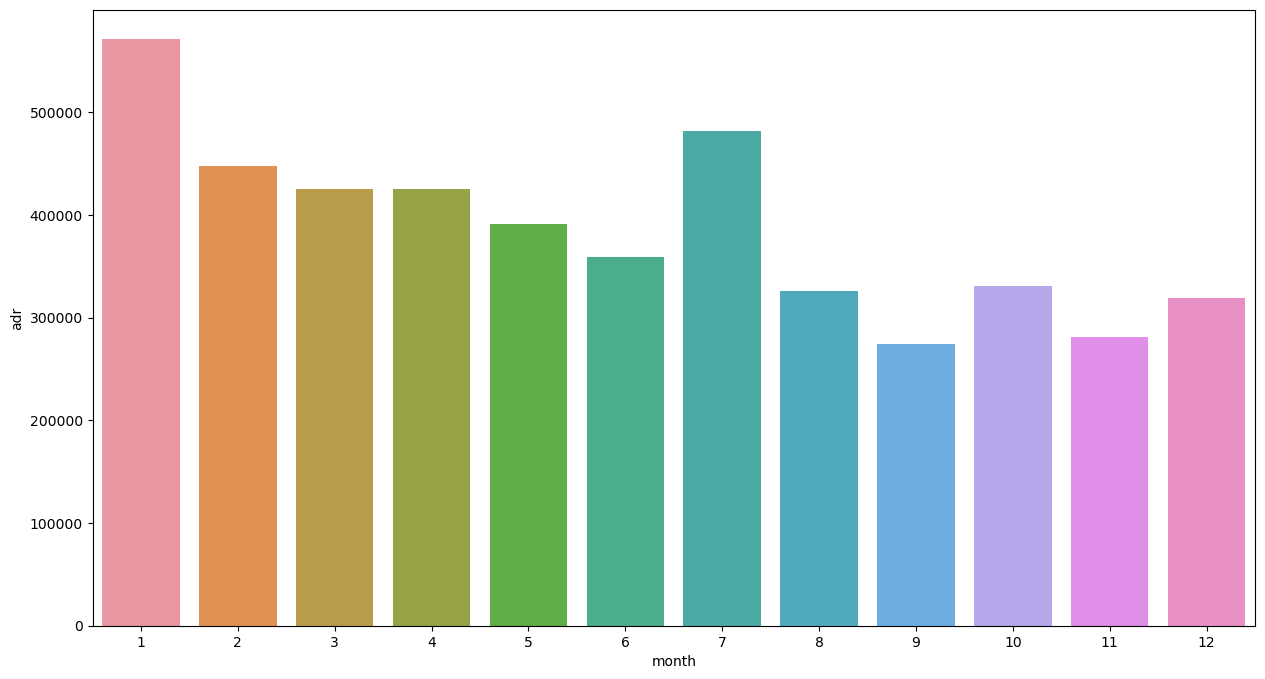

In [21]:
plt.figure(figsize = (15,8))
sns.barplot(x  = 'month',y = 'adr',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

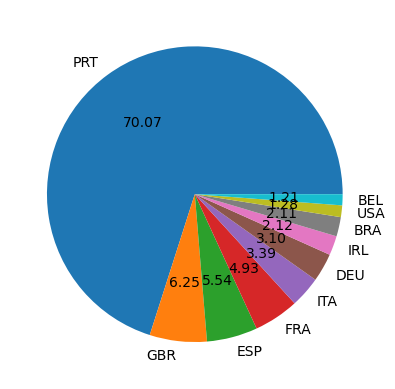

In [22]:
cancelled_data = df[df['is_canceled']==1]
top_10_countries = cancelled_data['country'].value_counts()[:10]
plt.pie(top_10_countries,autopct = "%.2f",labels= top_10_countries.index)
plt.show()

In [23]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [24]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

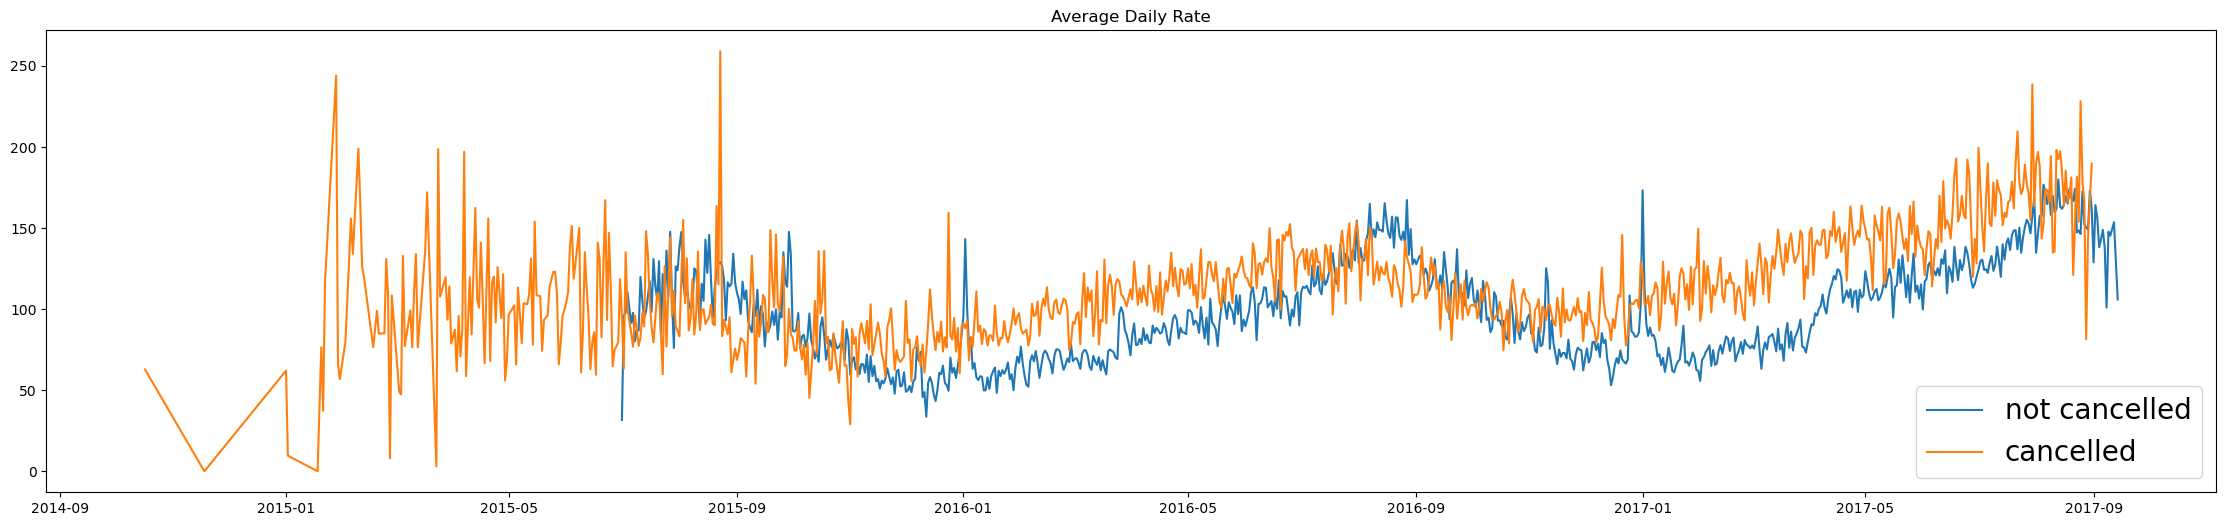

In [25]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean() 
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_df = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_df.groupby('reservation_status_date')[['adr']].mean() 
not_cancelled_df_adr.reset_index(inplace=True) 
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (28,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label ='not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled') 
plt.legend(fontsize = 20)

In [31]:
cancelled_df_adr  = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr  = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]                                   
                                     

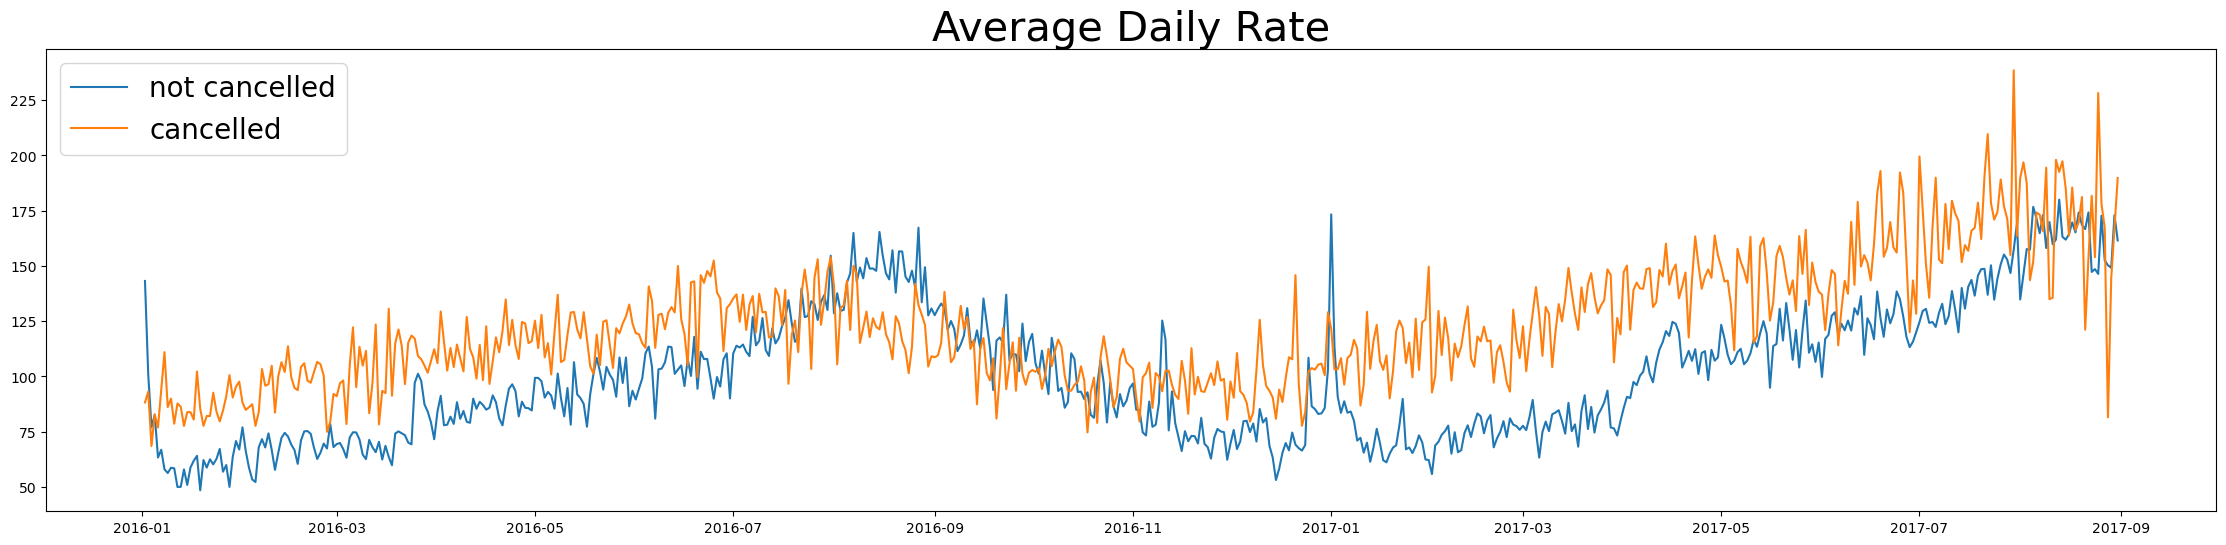

In [34]:


plt.figure(figsize = (28,6))
plt.title('Average Daily Rate',fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label ='not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled') 
plt.legend(fontsize = 20)
plt.show()